# Random forest classifier

Used this tutorial:
https://www.datacamp.com/community/tutorials/random-forests-classifier-python#building

In [1]:
import pandas as pd

data = pd.read_csv("kommune_multivariate.csv")
data.head()

,Unnamed: 0,Q1_natur_kom_1,Q1_natur_kom_2,Q1_natur_kom_3,Q1_kultur_kom_1,Q1_kultur_kom_2,Q1_kultur_kom_3,Q1_kultur_kom_4,Q1_kultur_kom_5,Q1_kultur_kom_6,...,Fylke_9,Fylke_10,Fylke_11,Fylke_12,Fylke_14,Fylke_15,Fylke_18,Fylke_19,Fylke_20,Fylke_50
0,0,4.0,3.0,4.0,6.0,6.0,6.0,6.0,4.000000,6.0,...,0,0,0,0,0,0,1,0,0,0
1,1,5.0,3.0,3.0,6.0,4.0,6.0,4.0,5.000000,6.0,...,0,0,0,0,0,0,1,0,0,0
2,2,7.0,6.0,6.0,6.0,6.0,4.0,5.0,5.999987,6.0,...,0,0,0,0,0,0,0,0,0,0
3,3,6.0,6.0,3.0,3.0,2.0,2.0,2.0,4.000000,6.0,...,0,0,0,0,0,0,0,0,0,0
4,4,4.0,7.0,6.0,5.0,5.0,5.0,1.0,6.000000,5.0,...,0,0,0,0,0,0,1,0,0,0


In [2]:
data.shape

(3359, 150)

In [3]:
data = data.drop(['Unnamed: 0'],axis=1)
data = data.drop(['Id'],axis=1)

In [4]:
print(data.shape)
data = data.dropna() 
print(data.shape)

(3359, 148)
(3220, 148)


In [5]:
data = data[data.Q16 != 11.0]
data = data[data.Q16 != 12.0]
data = data[data.Q16 != 13.0]

In [6]:
import math
import numpy as np

shuffled = data.iloc[np.random.permutation(len(data))]

test = shuffled[:280] 
train = shuffled[280:]

test_y = test["Q16"]
train_y = train["Q16"]

test_X = test.drop(['Q16'],axis=1).values
train_X = train.drop(['Q16'],axis=1).values

### Create random forest classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=5000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train_X,train_y)

y_pred=clf.predict(test_X)

### Calculate accuracy

In [8]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.3607142857142857


In [9]:
print(clf.predict(test_X[:10]))
print(test_y[:10])

[1. 1. 3. 3. 3. 1. 3. 3. 3. 1.]
3233    3.0
1129    5.0
2979    9.0
3117    3.0
2046    1.0
1468    1.0
2412    5.0
874     3.0
1952    3.0
3353    1.0
Name: Q16, dtype: float64


### Calculate feature importance

In [10]:
# Feature importance scores
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=list(data.drop(['Q16'],axis=1))).sort_values(ascending=False)

for i in range(len(feature_imp)):
    print(str(feature_imp[i]) + "\t" + str(feature_imp.index[i]))

0.019649173196508985	Q9_8
0.01932701623438543	Q1_arbeid_kom_3
0.018989258126614384	Q61a
0.01812144521871077	Q1_samferdsel_kom_4
0.01733864573596714	Q9_5
0.01694123225248535	Q13_1
0.016762029301492985	Q11_1
0.016429802748609282	Q14_1
0.01624325770720204	Q9_6
0.016080476027244557	Q3_5
0.01578587196330365	Q9_1
0.015734654491400133	Q1_samferdsel_kom_5
0.015460791987177269	Q3_4
0.015430313800193796	Q1_arbeid_kom_2
0.015374397833489479	Q1_natur_kom_2
0.015227494099832862	Q3_1
0.015081973125441926	Q9_10
0.01444296342705963	Q9_9
0.014432448189900188	Q9_2
0.014354650249729596	Q1_kultur_kom_1
0.014280437646778015	Q3_3
0.014233575291081935	Q9_11
0.014226212562183878	Q1_samferdsel_kom_3
0.014201419827285938	Q1_samferdsel_kom_1
0.014093033141030071	Q9_4
0.01405003546951811	Q1_kultur_kom_4
0.01386365254652823	Q1_kultur_kom_5
0.013810267385907788	Q19_2
0.013795751557978068	Q1_kultur_kom_2
0.013484754630904938	Kommunestr
0.013484220279080363	Q1_samferdsel_kom_6
0.013459426984588047	Q9_7
0.013302420161

### Visualizing feature importance

No handles with labels found to put in legend.


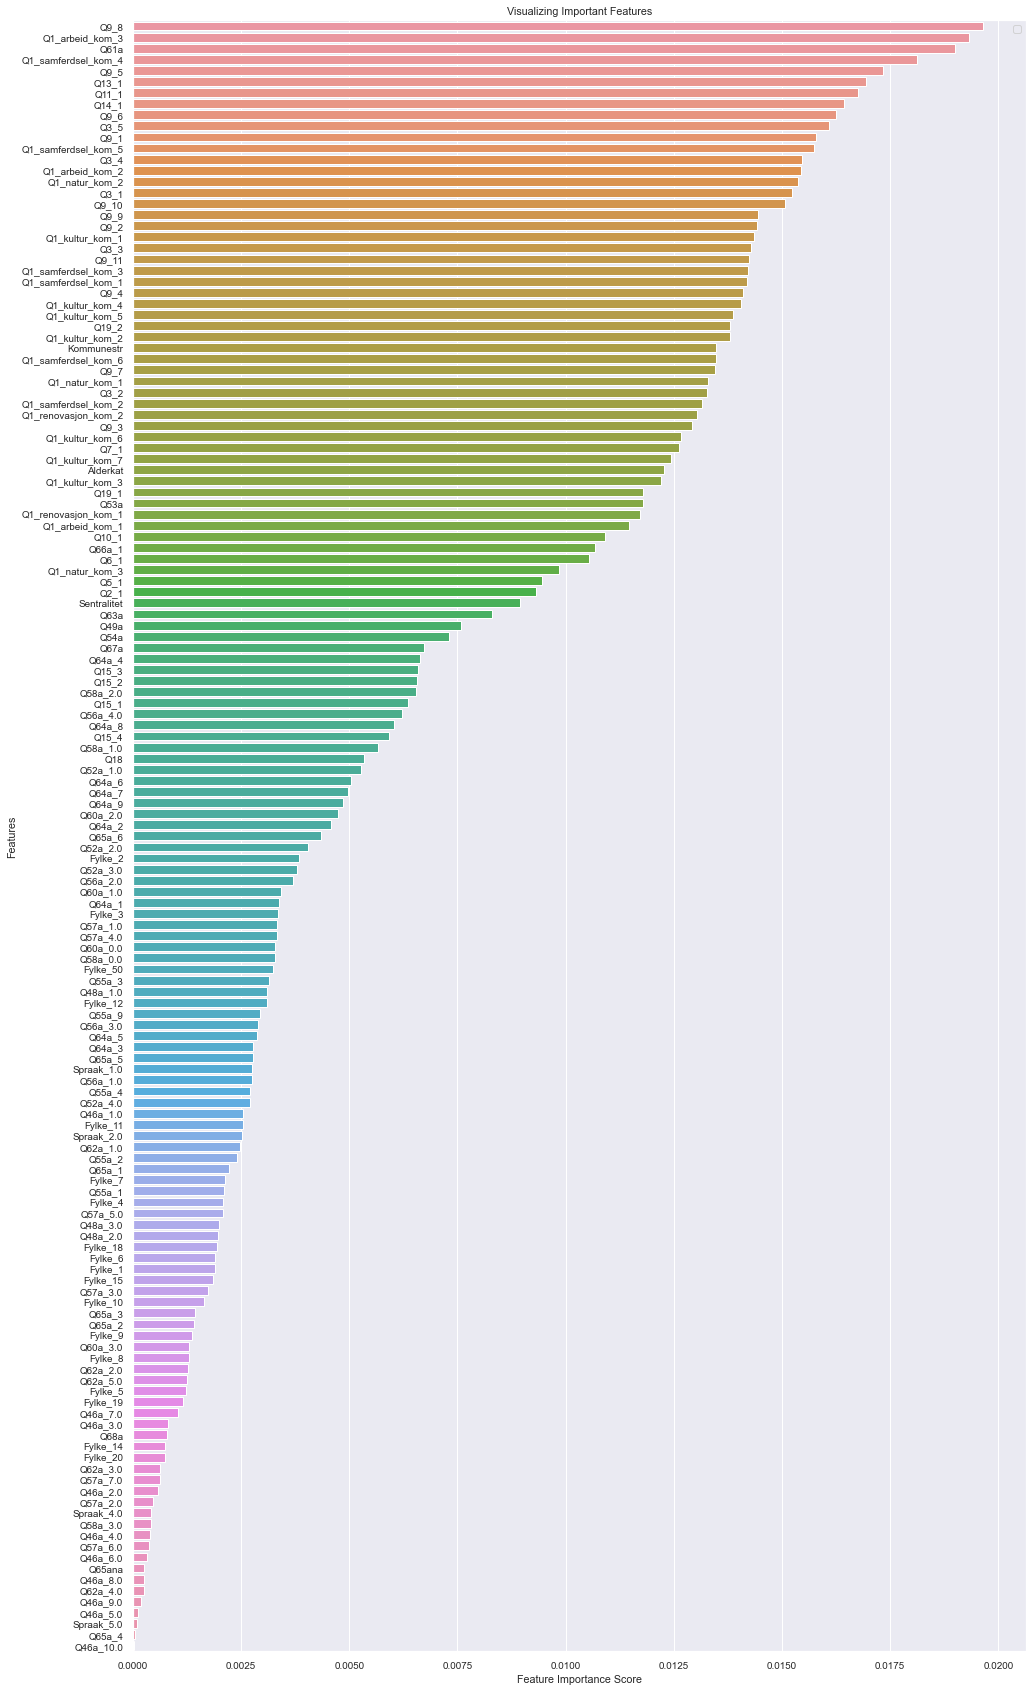

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc = {'figure.figsize':(16,30)}, font_scale=0.9)

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()